In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import requests

In [17]:
def sample_books(book_urls, Author_name,book_name):
    # Create a list to store the DataFrames
    dataframes = []
    # Iterate over the book URLs and labels
    for url, label, title in zip(book_urls, Author_name,book_name):
        # Download book from Gutenberg
        book = requests.get(url)
        book = book.text
        # Split book into a list of words
        words = book.split()
        # Create a list to store the partitions
        partitions = []
        # Use a for loop to sample 200 partitions of 100 words each
        for i in range(200):
            start_index = random.randint(0, len(words) - 150)
            partition = words[start_index : start_index + 150]
            partitions.append(" ".join(partition))
        # Create a Pandas DataFrame to store the partitions
        data = {'text': partitions,'author': [label]*200,'book':title}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        dataframes.append(df)
    # Concatenate the DataFrames into a single DataFrame
    final_df = pd.concat(dataframes)
    #return dataframe
    return final_df

In [18]:
book_urls = ['http://www.gutenberg.org/files/1342/1342-0.txt', 'http://www.gutenberg.org/files/84/84-0.txt','https://www.gutenberg.org/files/2701/2701-0.txt','https://www.gutenberg.org/files/1228/1228-0.txt','https://www.gutenberg.org/files/2600/2600-0.txt']
Author_name = ['Jane Austen', 'Mary Wollstonecraft Shelley','Herman Melville', 'Charles Darwin','Leo Tolstoy']
book_name = ['Pride and prejudice', 'Frankenstein','Moby-Dick','The Origin of Species','War and Peace']
df = sample_books(book_urls, Author_name,book_name)

In [19]:
# Preprocess the data
df['text'] = df['text'].str.lower() # Convert to lowercase
df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]','') # Remove punctuation

<ipython-input-19-a490076a9bbe>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]','') # Remove punctuation


In [20]:
# TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
tfidf = vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

d:\softwares\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
tfidf

<1000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 87388 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(tfidf)

KMeans(n_clusters=5)

In [23]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [24]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
X_embeddedd = svd.fit_transform(tfidf)

# X_embedded = PCA(n_components=2).fit_transform(train_matrix)

In [25]:
svd = TruncatedSVD(n_components=2, random_state=42)
c_trans = svd.fit_transform(centers)
# centroids_2d = pca.transform(centers)

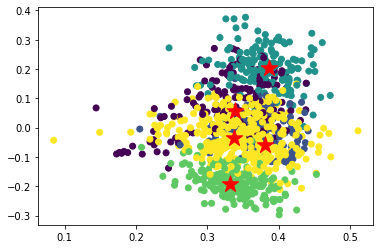

In [26]:
plt.scatter(X_embeddedd[:, 0], X_embeddedd[:, 1], c=labels)
# plt.scatter(centers[:, 0], centers[:, 3], marker='x', s=200, linewidths=3, color='r')
plt.scatter(c_trans[:, 0], c_trans[:, 1], marker='*', s=300, c='r')
plt.show()